
# Software Package for the Maximum Entropy on the Mean (MEM) Method

## Introduction
The maximum entropy on the mean (MEM) is an information driven statistical estimation method. In its core lies the MEM function defined as

$$ \kappa_P(y):=\inf \left\{\text{KL}(Q, P): E_Q=y, Q\ll P \right\},$$

where $P$ is a given reference distribution, $\text{KL}(Q,P)$ is the Kullback-Leibler divergence of a distribution $Q$ with respect to $P$, $E_Q$ stands for the mathematical expectation of $Q$ and finally $Q\ll P$ indicates that $Q$ is absolutely continuous with respect to $P$. Under some conditions, the function $\kappa_P$ coincides with the Cramér rate function which admits a closed form or computationally tractable expression for many popular choices of reference distribution $P$.

The goal of this notebook is to provide a documentation for memmpy, a python package supplementing the paper:
<br>
<center style="font-size:14px"> <em> Maximum Entropy on the Mean and the Cramér Rate Function in Statistical Estimation: Properties, Models and Algorithms </em></center>

[//]: # "COMPLETE: paper info"

Additional details, proofs and examples can be found in the above reference and the supplemental material file that is available with this package.


This package contains an implementation of the Cramér rate function and Bregman proximal operators for many well known reference distributions. It supports the three linear models discussed in the paper, i.e., the linear models that correspond to the normal, Poisson and Gamma (with parameter $\beta=1$) distributions.
Furthermore, this package includes an implementation of some popular first-order optimization algorithms which employ the operators. Some examples for image processing applications are included as well.


[//]: # "COMPLETE: license info"


## Documentation

The memmpy package contains the following files:

- dist.py - implementation Cramér rate function and Bregman proximal operators for the supported reference distributions (see table below).
- methods.py - implementation of first order optimization algorithms.
- misc.py - miscellaneous utility routines that support the main operators implemented in this package.

Additional files distributed with the package are:
- imgproc.py - implementation of supplementary image processing routines used in order to demonstrate some practical use cases of the MEM framework.
- mem_sup.pdf - supplementary document that contains a detailed derivation of the Bregman proximal operators implemented in this package.

The package supports the following distributions:

<center style="font-size:14px">

|             Distribution             |    Class name    | Parameters                                                                                                                  |           Expected value           | Comments                                                                                                                        |
|:------------------------------------:|:----------------:|:----------------------------------------------------------------------------------------------------------------------------|:----------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------|
|                Normal                |      normal      | $\mu$ - location <br/> $\sigma$ - scale                                                                                     |               $\mu$                | $\sigma>0$                                                                                                                      |
|         Multivariate Normal          |    multnormal    | $\mu$ - location <br/> $\Sigma$ - covariance matrix                                                                         |               $\mu$                | $\Sigma$ - positive definite                                                                                                    |
|              Bernoulli               |    bernoulli     | $p$ - success probability                                                                                                   |                $p$                 | $p\in[0, 1]$                                                                                                                    |
|       Normal-inverse Gaussian        |   norminvgauss   | $\mu$ - location <br/>  $\alpha$ - shape <br/> $\beta$ - skewness <br/> $\delta$ - scale                                    |     $\mu + \delta\beta/\gamma$     | $\gamma:=\sqrt{\alpha^2 - \beta^2}$, $\alpha>                                                                                   |\beta|$, $\delta>0$   |
| Multivariate Normal-inverse Gaussian | multnorminvgauss | $\mu$ - location <br/>  $\alpha$ - shape <br/> $\beta$ - skewness <br/> $\delta$ - scale <br/> $\Sigma$ - covariance matrix | $\mu + (\delta/\gamma)\Sigma\beta$ | $\gamma:=\sqrt{\alpha^2 - \beta^T\Sigma\beta}$, $\alpha^2 > \beta^T\Sigma\beta$, <br/> $\delta>0$, $\Sigma$ - positive definite |
|                Gamma                 |      gamma       | $\alpha$ - shape  <pr/>  $\beta$ - rate                                                                                     |           $\alpha/\beta$           | $\alpha > 0$, $\beta > 0$                                                                                                       |
|               Poisson                |     poisson      | $\lambda$ - rate                                                                                                            |             $\lambda$              | $\lambda>0$                                                                                                                     |
</center>

Some remarks:
- Most parameters are assumed to be numpy arrays (valid inputs also include: scalars, tuples and lists). The parameters must be of compatible sizes, for example, for the normal distribution $\mu$ and $\sigma$ must have the same size (shape).
- Some distributions are defined by means of a covariance matrix. There is no need to provide the matrix itself, instead one should define the following operators (functions);
    - Multivariate normal distribution:
        - cov_mat(x) - an operator that yields the product $\Sigma x$.
        - cov_mat_inv(x) - an operator that yields the product $\Sigma^{-1}x$.
        - res_cov_mat(x, rho) - an operator that yields a product with the resolvent of the covariance matrix $(\rho I +\Sigma)^{-1}x$.
    - Multivariate normal-inverse Gaussian distribution:
        - cov_mat(x) - an operator that yields the product $\Sigma x$.
        - cov_mat_inv(x) - an operator that yields the product $\Sigma^{-1}x$.
        - res_cov_mat_inv(x, rho) - an operator that yields a product with the resolvent of the covariance inverse matrix $(\rho^{-1} I +\Sigma^{-1})^{-1}x$.

Each distribution supports the following functions
- freeze - freeze the distribution for the given parameters (arguments: distribution parameters).
- Cramer - retrieve the value of the Cramér rate function at a given point (arguments: distribution parameters and point for evaluation).
- bregman_prox_gen - retrieve a function defining the Bregman proximal operator (arguments: distribution parameters and reference distribution of the linear model). The resulting function computes the Bregman proximal operator at a given point under a predefined positive step size.

For the Bregman proximal operator, the package supports the following linear models:


As an illustration, let us consider the normal distribution.

In [8]:
import numpy as np
from memmpy.dist import normal

# The value of Cramer rate function with normal reference distribution with parameters (mu=0, sigma=1) at point x=2
print('Result: ', normal.cramer(2, mu=0, sigma=1))

# We can use the freeze function to avoid repeated specification of the arguments
normal.freeze(mu=0, sigma=1)
print('Result (after freeze): ', normal.cramer(2))

# We can consider examples with higher dimensions
normal.freeze(mu=np.zeros(5), sigma=np.ones(5))
x = np.random.rand(5)
print('Result (higher dimension): ', normal.cramer(x))

# Retrieving the Bregman proximal operator that correspond to the Gamma linear model is as follows
breg_prox = normal.bregman_prox_gen(kernel='Gamma')

# Now we can use this function to compute the Bregman proximal operator with some step-size (t) at a given point
print('Result (Bregman proximal operator): ', breg_prox(x, t=1))


Result:  2.0
Result (after freeze):  2.0
Result (higher dimension):  0.5047031154195324
Result (Bregman proximal operator):  [0.2393981  0.24695104 0.56739532 0.31686971 0.21624911]


For the multivariate normal distribution we must provide the operators defining the mappings associated with the covariance matrix. This allows an efficient implementation when the covariance matrix admits some structure. Below we illustrate how to define these mappings on a simple small dimensional example.

In [9]:
import numpy as np
from memmpy.dist import multnormal

N = 10
A = np.random.rand(2*N, N)
A = A.transpose().dot(A)

multnormal.freeze(np.zeros(N), lambda x: A.dot(x), lambda x: np.linalg.inv(A).dot(x), lambda x, rho: np.linalg.inv(rho+A).dot(x))

print('Result: ', multnormal.cramer(np.random.rand(N)))


Result:  0.3337816479997277


[//]: # "COMPLETE: document how to define a model and use the methods."


## Examples

We illustrate the use of the memmpy package for some classical image processing applications.

### Barcode Image Deblurring

We consider the problem of image deblurring of a QR code image. Due to its binary nature we will employ a MEM function induced by a Bernoulli reference distribution as a regularization term.


<Figure size 432x288 with 0 Axes>

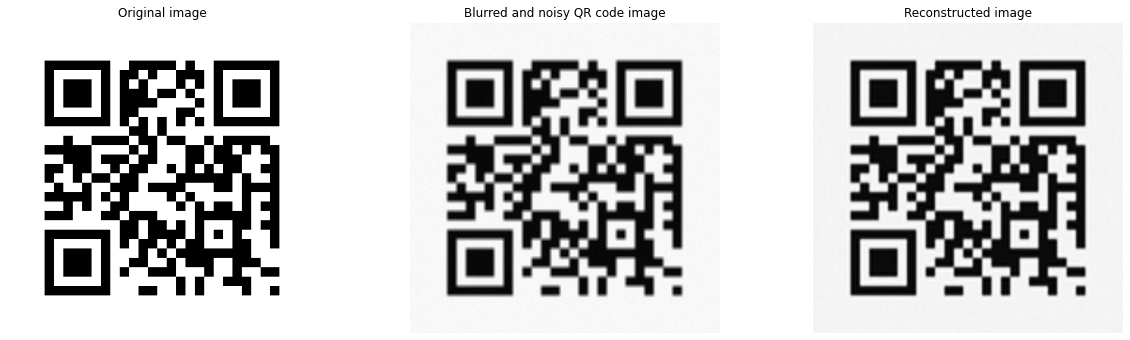

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import qrcode as qr
import memmpy.imgproc as ip
import memmpy.methods as mtd
from memmpy.dist import normal
from memmpy.dist import bernoulli


# Create a QR code image
qr = qr.QRCode(error_correction=qr.constants.ERROR_CORRECT_H,  box_size=10)
qr.add_data('www.google.com')
img = np.array(qr.make_image().get_image(), dtype='float')

# Add blurring affect
psf, center = ip.psfGauss([5,4], 3)
spectra, trans, itrans = ip.spectral_decomposition_gen(psf, center, img.shape, 'periodic')
img_obs = itrans(np.multiply(spectra, trans(img)))

# Add noise
noise = np.random.normal(0, 1, img.shape)
img_obs += 0.01 * np.linalg.norm(img_obs, 'fro') * noise/np.linalg.norm(noise)

# Define model functions - fidelity function - f
reg_par = 0.05 # Set regularization parameter
observed_signal_freq = trans(img_obs)

def f_residual(x):
    return np.multiply(spectra, trans(x)) - observed_signal_freq

def f_val(x, is_residual=False):
    if is_residual:
        return (1 / 2 * reg_par) * np.linalg.norm(x) ** 2
    else:
        return (1 / 2 * reg_par) * np.linalg.norm(np.multiply(spectra, trans(x)) - observed_signal_freq) ** 2

def f_grad(x, is_residual=False):
    if is_residual:
        return itrans(np.multiply(spectra.conj(), x)) / reg_par
    else:
        return itrans(np.multiply(spectra.conj(), np.multiply(spectra, trans(x)) - observed_signal_freq)) / reg_par

f = mtd.ObjectiveFunction(val=f_val, grad=f_grad, residual=f_residual,
                          kernel=mtd.KernelFunction(normal.kernel_val, normal.kernel_grad, normal.kernel_grad_dual),
                          smoothness_constant=np.max(np.max(np.abs(spectra) ** 2)) / (reg_par ** 2))

# Define model functions - regularization function - g
bernoulli.freeze(np.full_like(img_obs, 0.5))
# g = mtd.ObjectiveFunction(val=lambda x: 0, proximal_operator=lambda x, t: x)
g = mtd.ObjectiveFunction(val=bernoulli.cramer, proximal_operator=bernoulli.bregman_prox_gen('Normal'))

# Define model
data = mtd.ProblemData(f, g, img, img_obs)

# Solve
pars = mtd.Parameters(initial_point=img_obs, max_iter=200)
res = mtd.bpg(data, pars)

# Plot the original, blurred and noisy, and reconstructed images

plt.gray()
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(img) 
ax1.axis('off')
ax1.title.set_text('Original image')
ax2.imshow(img_obs)
ax2.axis('off')
ax2.title.set_text('Blurred and noisy QR code image')
ax3.imshow(res.opt_sol)
ax3.axis('off')
ax3.title.set_text('Reconstructed image')

fig.subplots_adjust(wspace=0.3)


### Natural Image Deblurring

 [//]: # "COMPLETE: description"

<Figure size 432x288 with 0 Axes>

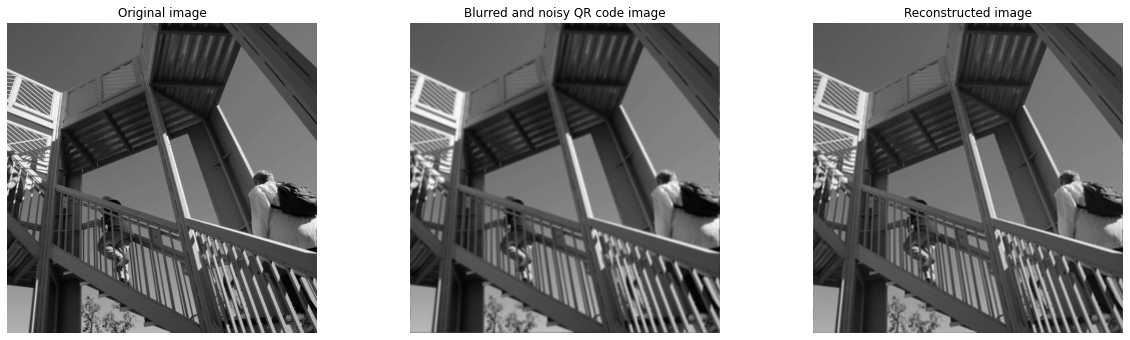

In [11]:
import numpy as np
import memmpy.methods as mtd
import matplotlib.pyplot as plt
import memmpy.imgproc as ip
from scipy.misc import ascent
from memmpy.dist import multnorminvgauss

# Create an image
img = ascent()
img = img/np.max(img)

# Add blurring affect
psf, center = ip.psfGauss([4, 4], 2)
spectra, trans, itrans = ip.spectral_decomposition_gen(psf, center, img.shape, 'periodic')
img_obs = itrans(np.multiply(spectra, trans(img)))

# Add noise
noise = np.random.normal(0, 1, img.shape)
img_obs += 0.01 * np.linalg.norm(img_obs, 'fro') * noise / np.linalg.norm(noise)

# Define model functions - fidelity function - f
reg_par = 1 # Set regularization parameter
Atrans_img_obs = itrans(np.multiply(spectra.conj(), trans(img_obs)))
observed_signal_freq = trans(img_obs)


def f_val(x):
    return (1 / 2 * reg_par) * np.linalg.norm(np.multiply(spectra, trans(x)) - observed_signal_freq) ** 2

def f_proximal_operator(x, step_size):
    return itrans(np.multiply(1 / (1 + (step_size / reg_par) * np.multiply(spectra.conj(), spectra)),
                              trans(x + (step_size / reg_par) * Atrans_img_obs)))

f = mtd.ObjectiveFunction(val=f_val, proximal_operator=f_proximal_operator)

# Define model functions - regularization function - g
multnorminvgauss.freeze(alpha=1, beta=np.zeros((2 * img.shape[0], img.shape[1])),
                        mu=np.zeros((2 * img.shape[0], img.shape[1])), delta=0.1)
g = mtd.ObjectiveFunction(val=multnorminvgauss.cramer,
                          proximal_operator=multnorminvgauss.bregman_prox_gen('Normal'))

# Define the linear mapping - L
L = mtd.LinearMap(lambda x: ip.dif_map(x, 'periodic'), lambda y: ip.dif_map_adj(y, 'periodic'), 3/reg_par)

# Define model
data = mtd.ProblemData(f, g, L, img, img_obs)

# Solve
pars = mtd.Parameters(initial_point=img_obs, initial_point_dual=ip.dif_map(img_obs),
                      max_iter=200, output=False)  # , step_size=5000000000)
res = mtd.cp(data, pars)

# Plot the original, blurred and noisy, and reconstructed images
plt.gray()
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(img)
ax1.axis('off')
ax1.title.set_text('Original image')
ax2.imshow(img_obs)
ax2.axis('off')
ax2.title.set_text('Blurred and noisy QR code image')
ax3.imshow(res.opt_sol)
ax3.axis('off')
ax3.title.set_text('Reconstructed image')

fig.subplots_adjust(wspace=0.3)
